Vous allez maintenant mettre en oeuvre l'utilisation de l'écart normalisé et de la régression linéaire pour comparer les valeurs expérimentales avec la valeur théorique.

# (TP) Utilisation d'une régression linéaire. (1h)
Vous allez utiliser les cellules suivantes pour réaliser une régression linéaire à partir de la relation $d = c \Delta t$. Vous devrez :
* Vérifier la compatibilité avec le modèle linéaire par régression linéaire et tracé graphique (pensez aux écarts normalisés)
* Estimer ainsi la célérité et son incertitude au moyen d'une simulation de Monte-Carlo sur la régression linéaire.
* Comparer la valeur estimée aux attentes.

Pensez à regarder aussi [l'exemple complet](https://pcsi3physiquestan.github.io/tp_incertitude/notebook/exemple.html) pour comprendre.

## Possibilité d'un modèle linéaire

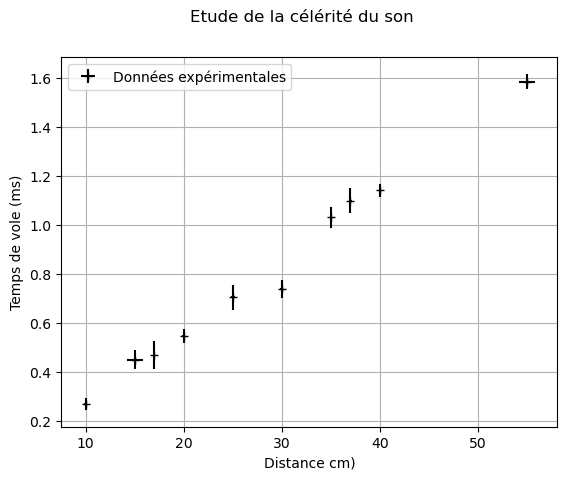

In [3]:
"""
------- MODULES UTILES -----------
Les bibliothèques utiles sont déjà importées.
"""
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rd

"""
------- DONNEES EXPERIMENTALES -----------
Pensez à changer les valeurs des données expérimentales. Les suivantes sont fictives
"""

d = np.array([10, 15, 17, 20, 25, 30, 35, 37, 40, 55])  # Liste des distances E-R (en cm - évitez les nombres trop petits)
ud = np.array([0.172, 0.82, 0.082, 0.14, 0.204, 0.17, 0.082, 0.16, 0.12, 0.81])  # Liste des incertitudes sur d
dt = np.array([0.27, 0.45, 0.47, 0.548, 0.705, 0.74, 1.03, 1.098, 1.14, 1.584])  # Liste des temps de vol (en ms)
udt = np.array([0.0245, 0.039, 0.057, 0.028, 0.0506, 0.037, 0.041, 0.05, 0.027, 0.031])  # Liste des incertitudes sur Delta t

"""
------- LOI COMPATIBLE A L'OEIL -----------
Le tracé a déjà été réalisé précédemment. On donne cette fois le code
"""
f, ax = plt.subplots()
f.suptitle('Etude de la célérité du son')
ax.set_xlabel("Distance cm)")
ax.set_ylabel("Temps de vole (ms)")

ax.errorbar(d, dt, xerr=ud, yerr=udt, label="Données expérimentales", marker="+", linestyle="", color="black")

ax.grid()
ax.legend()
plt.show()

_Vérifiez que l'hypothèse d'une loi linéaire est plausible._

## Ajustement linéaire
### Estimation de c
On réalise un ajustement linéaire simple pour obtenir la pente et donc une estimation de c. Comme $\Delta t$ est plus incertain que $d$, on choisi $\Delta t$ comme ordonnée. On calcule donc $1/c$ qu'on inverse ensuite.

In [5]:
par_m = np.polyfit(d, dt, 1)  # Régression linéaire
c_m = 1 / par_m[0]  # La célérité est l'inverse de la pente
ordo_m = par_m[1]  # On stocke aussi l'ordonnée à l'origine pour test ultérieur.

print(c_m * 10 )  # Passage en m/s

342.40394925850245


### Incertitude sur c
On ne peut utiliser la vectorialisation, donc on va utiliser la méthode 2 : on crée les N échantillons simulées d'un coup mais on réalise l'ajustement linéaire puis la détermination de $c$ dans une boucle, on stocke les valeurs et on calcule à la fin l'incertitude.

_Petite nouveauté : On utilise une syntaxe pour `numpy.random.uniform` qui permet de créer d'un seul coup les aleurs simulées pour TOUS les échantillons et de le stocker dans un tableau de taille (N, k) où k est le nombre de mesures:_

```
numpy.random.std(a: list/ndarray, b:list/ndarray, size :tuple)
```
avec:
* `a` et les `b` deux listes, ici `-ud` et `ud` (ou `-udt` et `udt`)
* `size` est un tuple donnant la taille du tableau à remplir (ici `(N, k)` avec `k = len(d)` ou `len(dt)`)
La ligne `j`du tableau (donc un jeu de valeurs simulées) s'obtiendra par `tableau[j]`.

In [6]:
"""
------- AJUSTEMENT LINEAIRE -----------
Vous devez réaliser un ajustement linéaire et en déduire une valeur des paramètres
(pente et ordonnées à l'origine) AVEC LEUR INCERTITUDE par méthode de Monte-Carlo.
La majeure partie du code est donnée.
"""
N = 10000
n_bin = len(d)  # Nombre de binômes

""" SIMULATION DES ECHANTILLONS
On crée directement des tableaux de N*k échantillons simulés pour d et dt
"""
k = len(d)
d_sim = d + rd.uniform(-ud, ud, (N, k))
dt_sim = dt + rd.uniform(-udt, udt, (N, k))

""" REGRESSIONS LINEAIRES
Réalisation des N régressions linéaires au moyen d'une boucle
"""
c_sim = []  # On stockera les célérité dans cette liste.
ordo_sim = []  # On conserve aussi les ordonnées à l'origine
for j in range(N): # On parcourt les N échantillons
    d_e = d_sim[j]  # Sélection des distances simulées
    dt_e = dt_sim[j]  # Sélection des temps de vol simulés
    par_e = np.polyfit(d_e, dt_e, 1)  # Régression linéaire
    c_e = 1 / par_e[0]  # La célérité est l'inverse de la pente
    ordo_e = par_e[1]  # Ordonnée à l'origine
    c_sim.append(c_e)  # Ajout de la célérité à la liste des valeurs simulées de c
    ordo_sim.append(ordo_e)  # Ajout de l'ordonnée à l'origine

""" -------------------------------------------------------
A VOUS DE CODER : Détermination des valeurs utiles
"""
c_u = np.std(c_sim)  # Ecrire ici l'instruction permettant d'avoir l'incertitude sur la célérité estimée à partir de c_sim
ordo_u = np.std(ordo_sim)  # Ecrire ici l'instruction permettant d'avoir son incertitude à partir de ordo_sim

""" FIN DE LA PARTIE A MODIER """

# Affichage des grandeurs.
print("c =" + str(c_m))
print("u(c) =" + str(c_u))
print("ordo =" + str(ordo_m))
print("u(ordo) =" + str(ordo_u))

c =34.24039492585025
u(c) =0.6393287649029444
ordo =-0.025929685653509914
u(ordo) =0.017424694095740333


## Vérifier la compatibilité du modèle

Lorsqu'on réalise un ajustement, on DOIT vérifier si cet ajustement est compatible avec les données expérimentales (_pensez qu'on peut mathématiquement n'importe quelle jeu de valeurs, même si elles ne sont pas alignées !_). Il existe deux méthodes :
* la vérification visuelle par un tracé graphique. __Elle est obligatoire__.
* le calcul d'écart normalisée pour des tests de cohérences. Il devient nécessaire seulement si la vérification visuelle ne permet pas de conclure.
Pour s'entrainer, on va faire les deux.

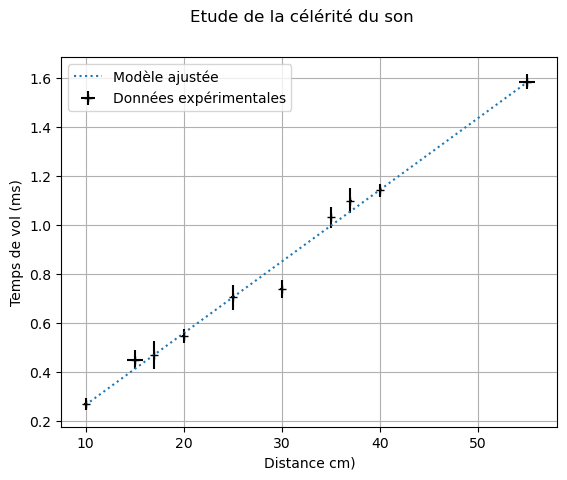

[0.15824406 0.97052888 0.00982307 0.36341881 0.01576917 2.97914684
 0.823054   0.86669345 0.08448664 0.11741295]


In [9]:
"""
------- TEST DE COMPATIBILITE DU MODELE -----------
1. Vérifier par un tracé graphique que la droite ajustée passe par les croix d'incertitude
2. Vérifier par un tracé graphique que tous les écarts normalisés entre
les valeurs expérimentales et les valeurs ajustées sont inférieurs à 2
"""

# COMPATIBILITE A L'OEIL
# On redonne les instructions pour le tracé des points de mesures expérimentales
f, ax = plt.subplots()
f.suptitle('Etude de la célérité du son')
ax.set_xlabel("Distance cm)")
ax.set_ylabel("Temps de vol (ms)")

ax.errorbar(d, dt, xerr=ud, yerr=udt, label="Données expérimentales", marker="+", linestyle="", color="black")

""" --------------------------------
A VOUS DE CODER
"""
dt_aju = d / c_m + ordo_m  # Obtenir les valeurs ajustées des temps de vol à partir de d_sim, c_m et ordo_m
# Ecrire ici l'instruction ajoutant le tracé de la droite ajustée à partir de dt_aju et d_sim.
ax.plot(d, dt_aju, linestyle=':', label='Modèle ajustée')

""" FIN DE LA PARTIE A MODIFIER """

ax.grid()
ax.legend()
plt.show()


# ----------------------------------------------------------------------------
# ECARTS NORMALISES (on supposera les valeurs ajustées sans incertitude pour simplifier)
# Cela revient à calculer un Z-score
"""
A VOUS DE CODER
"""
en_s = np.abs(dt_aju - dt) / (udt)  # Ecrire l'instruction permettant de calculer les écarts normalisés entre valeurs ajustées et valeurs expérimentales

print(en_s)  # Vérifier la compatibilité du modèle.


# Si le temps le permet, tracer les écarts normalisés en fonction de la distance.

__On observe que l'utilisation de la régression linéaire donne un modèle ajustée qui s'accorde avec beaucoup plus d'échantillons que la méthode de la moyenne (pour le meilleur et pour le pire). Seul un point reste en désaccord (le plus éloigné de la droite d'ajustement).__

In [11]:
"""
------- TEST DE COMPATIBILITE DE C -----------
Vérifier par un calcul d'écart normalisé que la valeur estimée de la célérité
est compatible avec les données théoriques (attention, cel_T est à redéfinir).
"""

def cel_T(T):
    """Fonction renvoie la célérité pour une température T"""
    return 331.5 + 0.607 * T

"""Estimation de c_attendue"""
T_m = 26 # Température
T_u = 1 # Incertitude sur la température
c_attendue = cel_T(T_m)



"""Estimation de l'incertitude sur c_atttendue"""
T_sim = T_m + rd.uniform(-T_u, T_u, N)
c_att_sum = cel_T(T_sim)  # l'opération réalisée par cel_T étant vectorialisable, on peut appliquer la fonction à un vecteur
c_att_u = np.std(c_att_sum, ddof=1)  # Calcul de l'incertitude sur la valeur attendue.


"""Calculer l'écart normalisé."""
c_m = c_m * 10 # Passage en m/s
c_u = c_u * 10 # Passage en m/s

en = np.abs(c_m - c_attendue) / np.sqrt(c_u**2 + c_att_u ** 2)

print(en)

0.7618476455547769
